In [1]:
import os
import pandas as pd
import numpy as np

# number time series per benchmark
NB_SERIES  = 250
# Percentage train
TRAIN_SIZE = 0.20

In [4]:
def get_g_max(n_classes):
    return int(np.floor((n_classes+1)/3))

In [5]:
VAR_LENGTH_DATASETS = ["CharacterTrajectories", "SpokenArabicDigits", "JapaneseVowels"]
FIX_LENGTH_DATASETS = ["ArticularyWordRecognition", "ERing", "Plane", "Cricket", "Mallat", "UWaveGestureLibrary", "Symbols", "PenDigits", "Fungi", "NATOPS", "ECG5000"]

In [ ]:
import tsmd_evaluation.benchmark_generation as benchmark_generation

columns = {'ds_name': str, 'nclasses': int, 'ndim': int , 'l_min': int, 'l_max': int, 'kappa_max' : int}
metadata = pd.DataFrame(columns, index=[])

from aeon.datasets import load_classification

path_to_benchmark = os.path.join(".", "benchmark")
if not os.path.exists(path_to_benchmark):
    os.mkdir(path_to_benchmark)


def znormalize(ts):
    ts = (ts - np.mean(ts, axis=None)) / np.std(ts, axis=None)
    return ts

for ds_name in FIX_LENGTH_DATASETS + VAR_LENGTH_DATASETS:
# for ds_name in ["Fungi"]:
    np.random.seed(0)    
    print(ds_name)
    # X, y
    X_train, y_train = load_classification(name=ds_name, split='train', load_equal_length=False)
    X_test, y_test = load_classification(name=ds_name, split='test', load_equal_length=False)

    df_train = benchmark_generation.convert_X_y_to_df(X_train, y_train)
    df_test = benchmark_generation.convert_X_y_to_df(X_test, y_test)

    # Combine, z-normalize, and resplit
    df = pd.concat((df_train, df_test)).reset_index(drop=True)
    df['ts'] = df['ts'].apply(znormalize)
    df_train = df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=TRAIN_SIZE)).sample(frac=1.0).reset_index(drop=True)
    df_test  = df.drop(df_train.index).sample(frac=1.0).reset_index(drop=True)
        
    # Generate tsmd benchmark
    classes = df['label'].unique()
    n_classes  = len(classes)
    g_max = get_g_max(n_classes)
    
    nb_train = int(TRAIN_SIZE * NB_SERIES) 
    nb_test  = NB_SERIES - nb_train

    benchmark_train = benchmark_generation.generate_tsmd_benchmark_dataset(df_train, nb_train, g_min=1, g_max=g_max)
    benchmark_test  = benchmark_generation.generate_tsmd_benchmark_dataset(df_test,  nb_test,  g_min=1, g_max=g_max)
    
    # Store the benchmark
    path_to_benchmark_dataset = os.path.join(path_to_benchmark, ds_name.lower())
    if not os.path.exists(path_to_benchmark_dataset):
        os.mkdir(path_to_benchmark_dataset) 

    benchmark_train.to_pickle(os.path.join(path_to_benchmark_dataset, 'validation.pkl'))
    benchmark_test.to_pickle(os.path.join(path_to_benchmark_dataset, 'test.pkl'))
        
    # Store metadata about the instances in the validation set
    d = df_train['ts'].iloc[0].shape[1]
    
    lengths = df_train['length'].to_numpy()
    l_min, l_max = np.min(lengths), np.max(lengths)
    
    new_row = {'ds_name': ds_name.lower(), 'nclasses': n_classes, 'ndim': d , 'l_min': l_min, 'l_max': l_max, 'kappa_max' : int(np.floor((n_classes+1) / 3.0))}
    metadata.loc[len(metadata)] = new_row

ArticularyWordRecognition
ERing
Plane
Cricket
Mallat
UWaveGestureLibrary
Symbols
PenDigits
Fungi
NATOPS
ECG5000
CharacterTrajectories
SpokenArabicDigits
JapaneseVowels


In [24]:
metadata = metadata.reset_index(drop=True)
metadata

,ds_name,nclasses,ndim,l_min,l_max,kappa_max
0,articularywordrecognition,25,9,144,144,8
1,ering,6,4,65,65,2
2,plane,7,1,144,144,2
3,cricket,12,6,1197,1197,4
4,mallat,8,1,1024,1024,3
5,uwavegesturelibrary,8,3,315,315,3
6,symbols,6,1,398,398,2
7,pendigits,10,2,8,8,3
8,fungi,18,1,201,201,6
9,natops,6,24,51,51,2


In [27]:
import locomotif.visualize as vis
import matplotlib.pyplot as plt

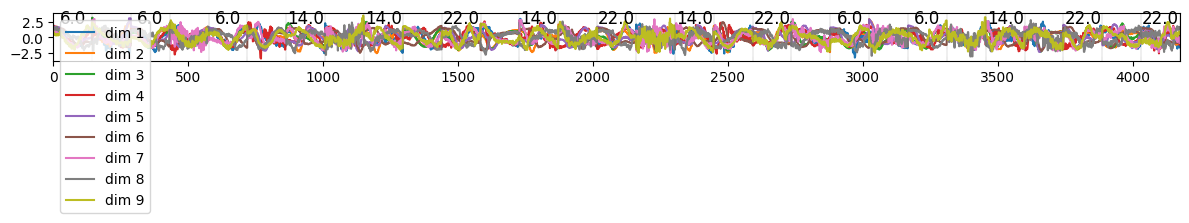

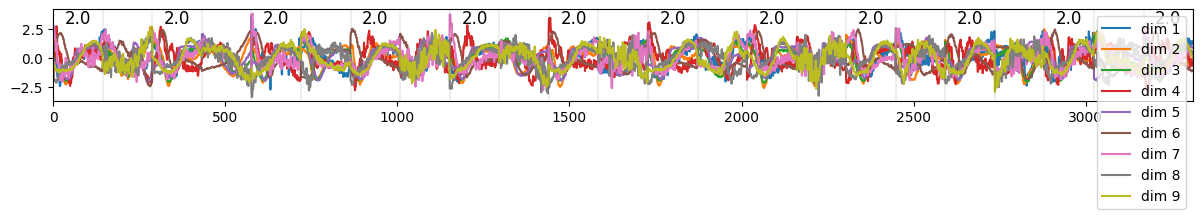

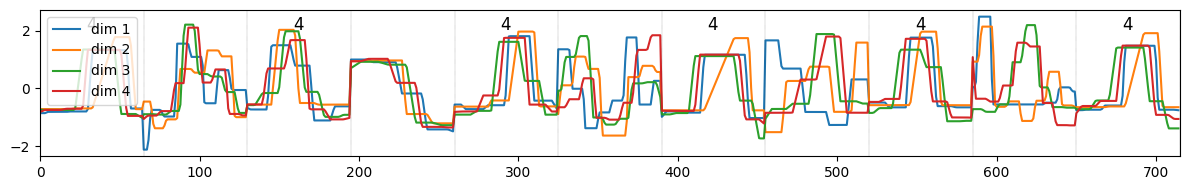

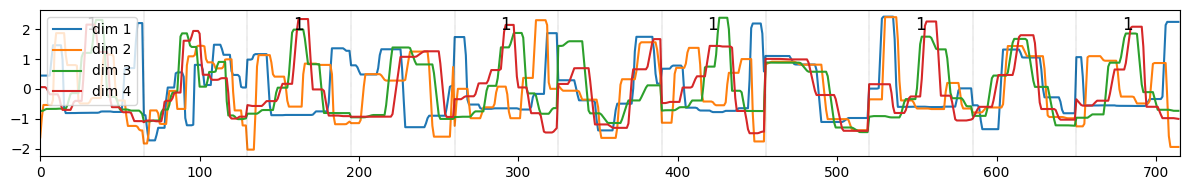

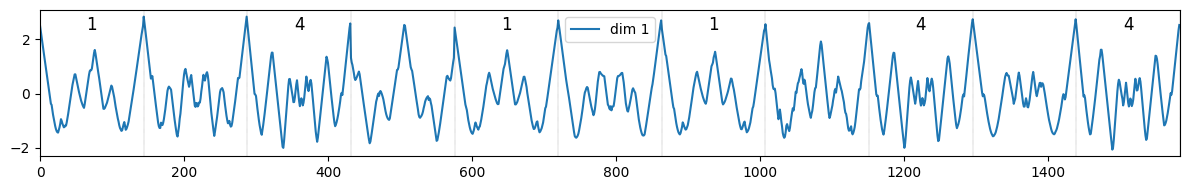

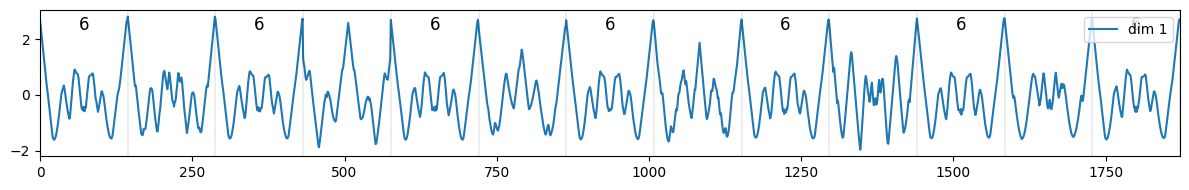

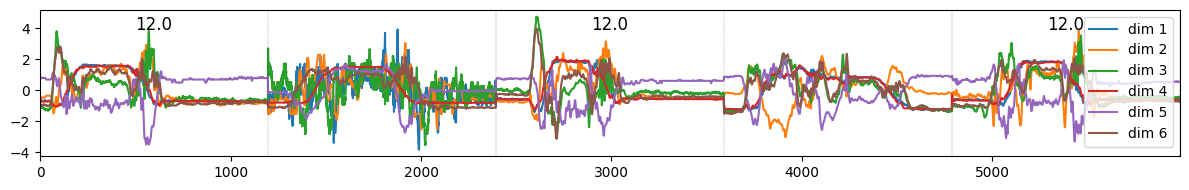

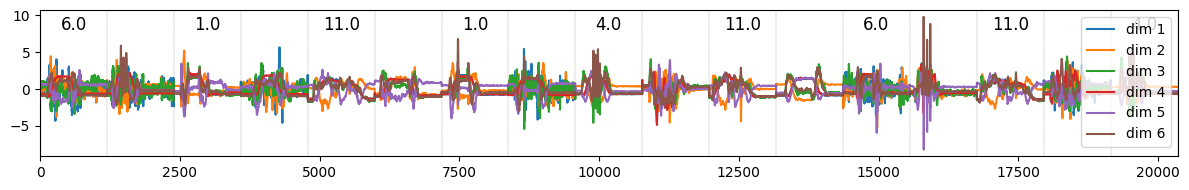

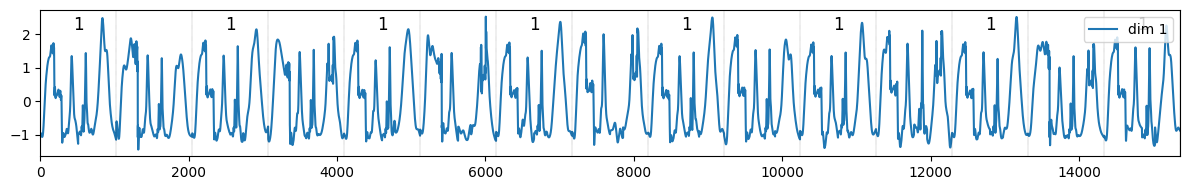

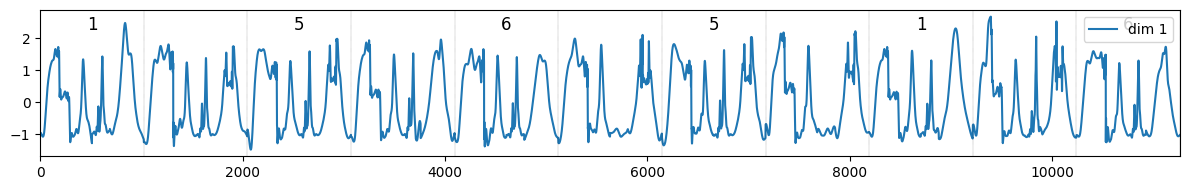

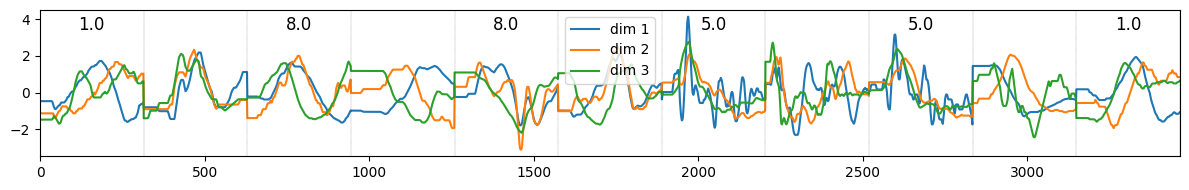

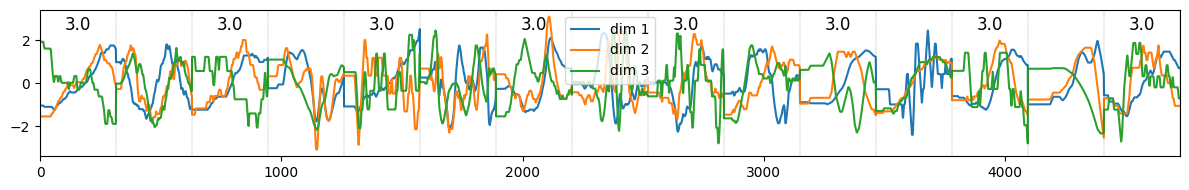

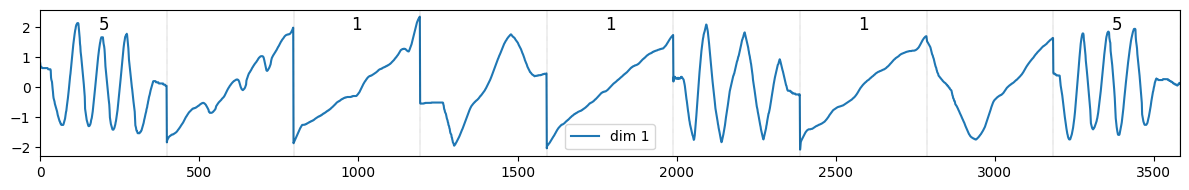

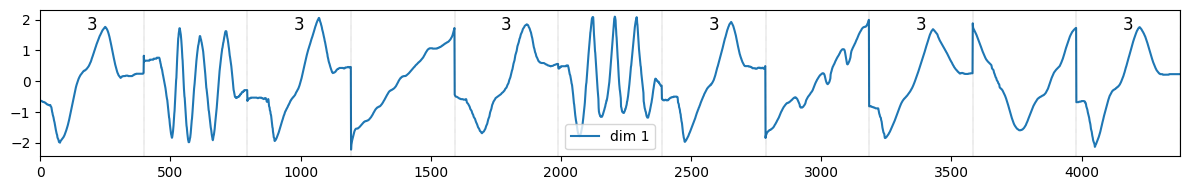

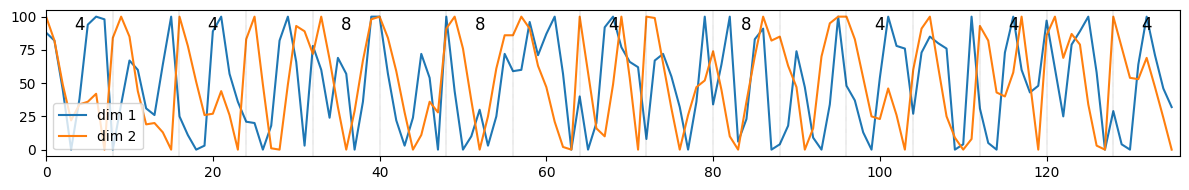

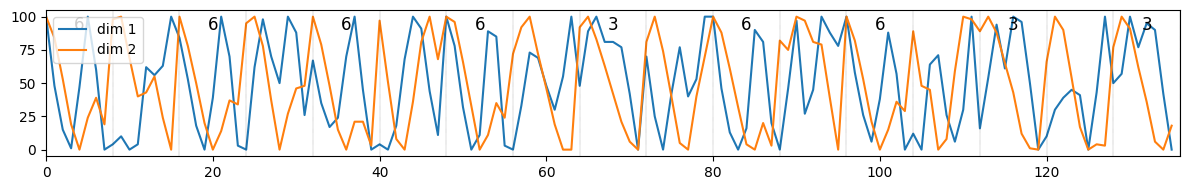

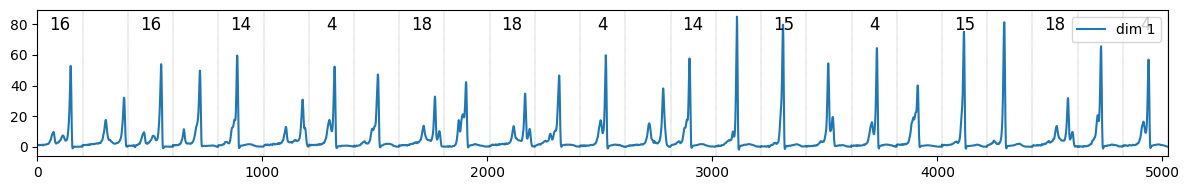

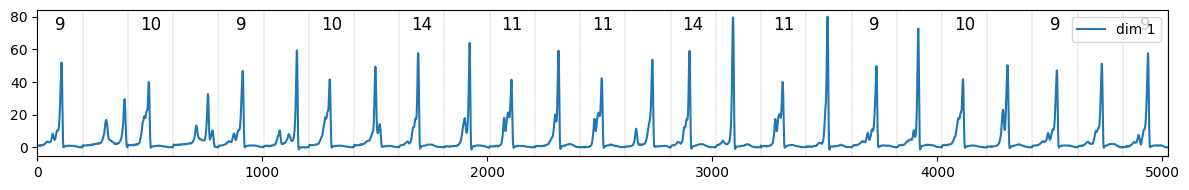

/cw/dtaijupiter/NoCsBack/dtai/daanv/miniconda3/envs/tsmdeval/lib/python3.9/site-packages/locomotif/visualize.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/cw/dtaijupiter/NoCsBack/dtai/daanv/miniconda3/envs/tsmdeval/lib/python3.9/site-packages/locomotif/visualize.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


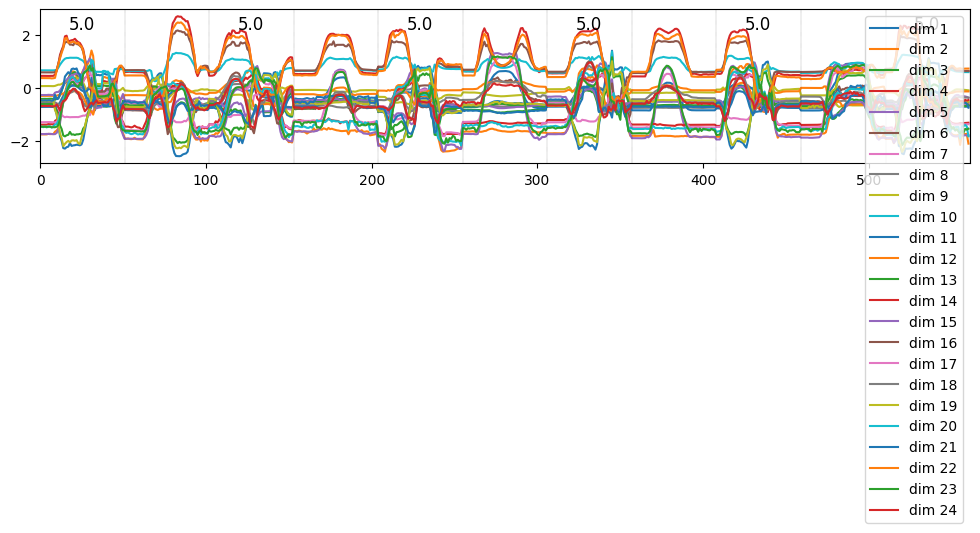

/cw/dtaijupiter/NoCsBack/dtai/daanv/miniconda3/envs/tsmdeval/lib/python3.9/site-packages/locomotif/visualize.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/cw/dtaijupiter/NoCsBack/dtai/daanv/miniconda3/envs/tsmdeval/lib/python3.9/site-packages/locomotif/visualize.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


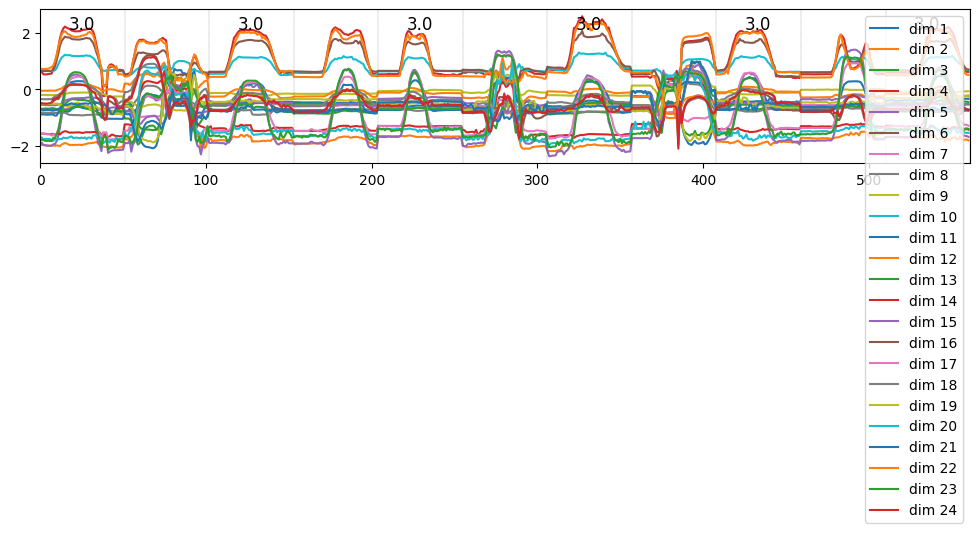

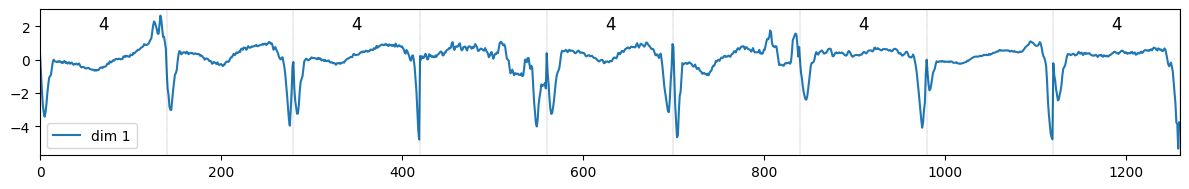

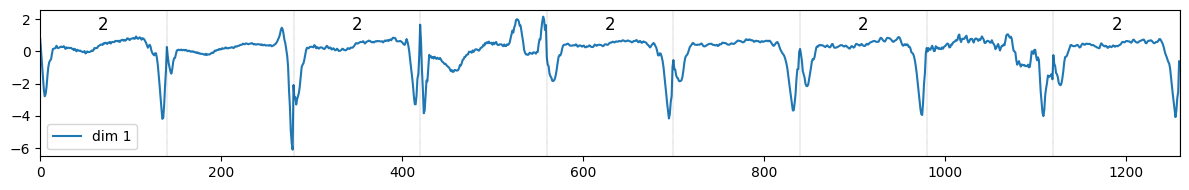

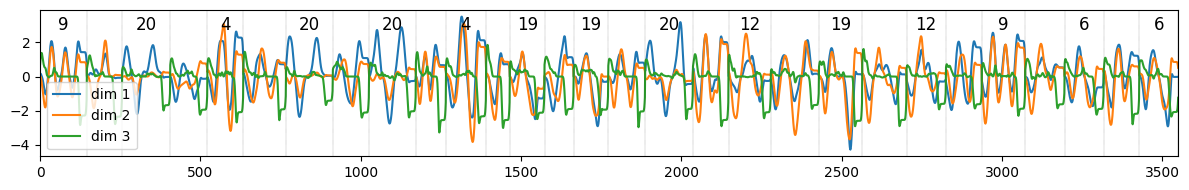

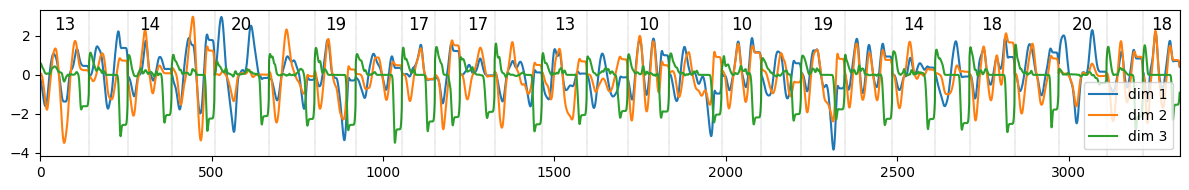

/cw/dtaijupiter/NoCsBack/dtai/daanv/miniconda3/envs/tsmdeval/lib/python3.9/site-packages/locomotif/visualize.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


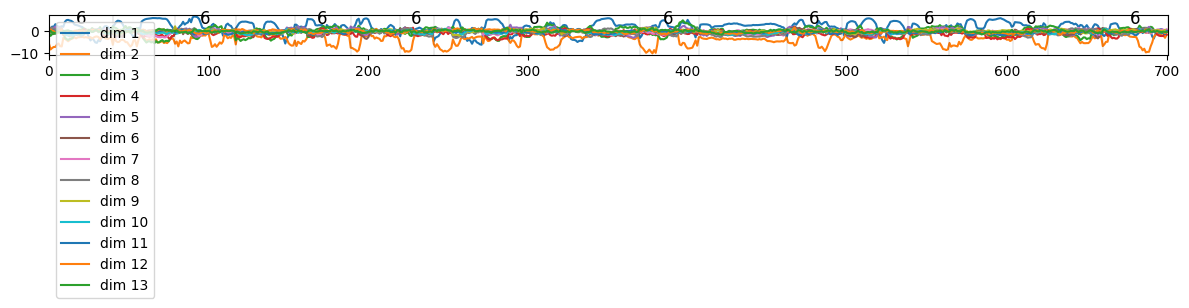

/cw/dtaijupiter/NoCsBack/dtai/daanv/miniconda3/envs/tsmdeval/lib/python3.9/site-packages/locomotif/visualize.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


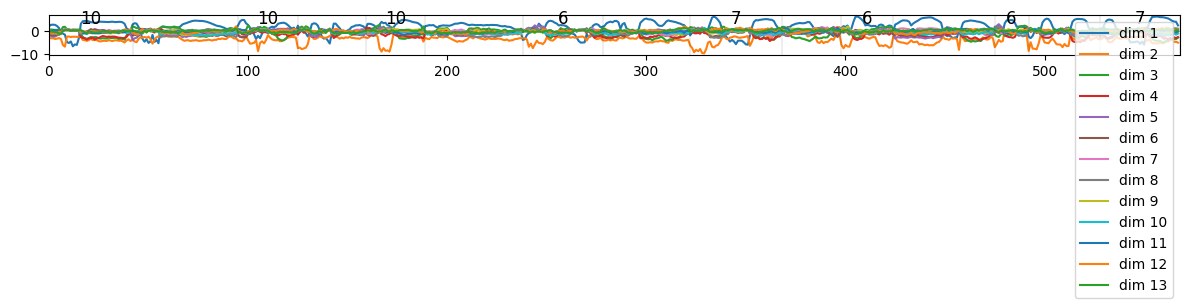

/cw/dtaijupiter/NoCsBack/dtai/daanv/miniconda3/envs/tsmdeval/lib/python3.9/site-packages/locomotif/visualize.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


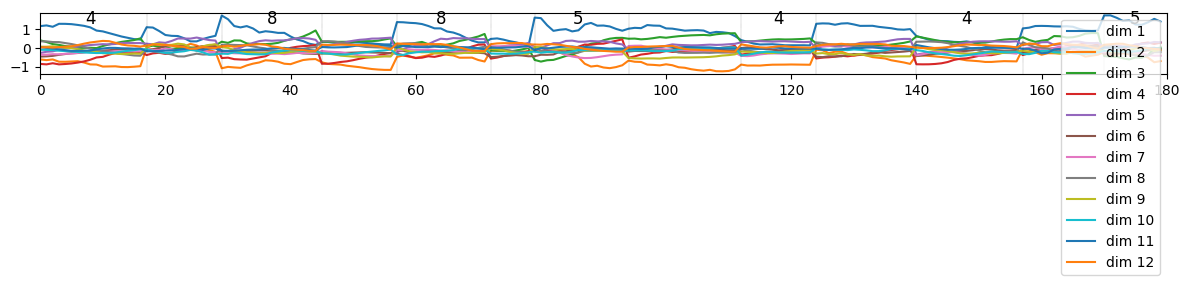

/cw/dtaijupiter/NoCsBack/dtai/daanv/miniconda3/envs/tsmdeval/lib/python3.9/site-packages/locomotif/visualize.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


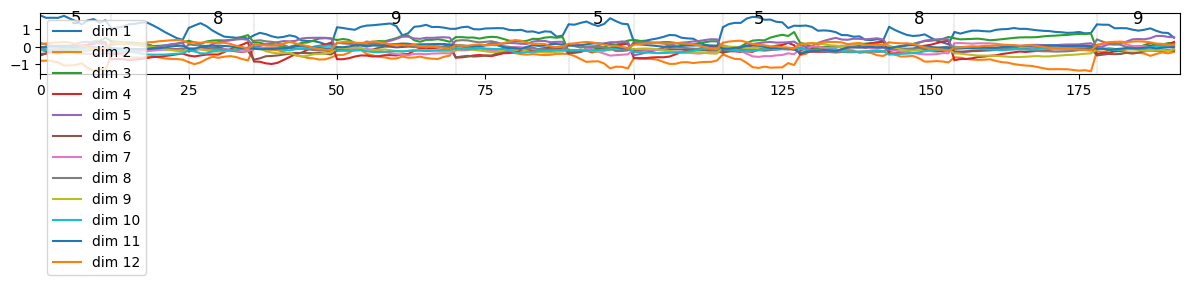

In [ ]:
for ds_name in FIX_LENGTH_DATASETS + VAR_LENGTH_DATASETS:]
    # Plot the first time series of the validation 
    path_to_val = os.path.join(path_to_benchmark, ds_name.lower(), 'validation.pkl')
    df_val = pd.read_pickle(path_to_val)
    ts, gt = df_val.iloc[0]
    vis.plot_motif_sets(ts, [], gt=gt)
    plt.show()

    # plot the last time series of the test
    path_to_test = os.path.join(path_to_benchmark, ds_name.lower(), 'test.pkl')
    df_test = pd.read_pickle(path_to_test)
    ts, gt = df_test.iloc[0]
    vis.plot_motif_sets(ts, [], gt=gt)
    plt.show()